# Proyek Analisis Data: Air Quality
- **Nama:** Naufal Suryo Saputro
- **Email:** a008ybm371@devacademy.id
- **ID Dicoding:** suryonaufal

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana tren tingkat PM2.5 secara keseluruhan di semua stasiun dari tahun ke tahun, dan pada bulan apa tingkat polusi tertinggi biasanya terjadi?

- Pertanyaan 2: Stasiun mana yang memiliki tingkat PM2.5 tertinggi, dan bagaimana hubungan antara kecepatan angin dan PM2.5 bervariasi antar stasiun?

## Import Semua Packages/Library yang Digunakan

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import zscore
import folium

## Data Wrangling

### Gathering Data

In [17]:
# Path ke folder data
data_path = r"D:\AnalisisKualitasUdara\data"

# Menggabungkan semua file CSV dari folder
all_files = [os.path.join(data_path, f) for f in os.listdir(data_path) if f.endswith('.csv')]
df_list = [pd.read_csv(file) for file in all_files]
df = pd.concat(df_list, ignore_index=True)

# Tampilkan 5 baris pertama
print("5 Baris Pertama Data:")
display(df.head())

print(f"- Total baris data: {df.shape[0]}, Total kolom: {df.shape[1]}")

5 Baris Pertama Data:


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


- Total baris data: 420768, Total kolom: 18


**Insight:**
- Data berhasil digabungkan dari beberapa file CSV.
- Total baris data: 420768, Total kolom: 18

### Assessing Data

In [18]:
# Informasi dasar dataset
print("Informasi Dataset:")
df.info()

# Cek missing values
print("\nJumlah Missing Values per Kolom:")
display(df.isnull().sum())

# Cek duplikat
print(f"\nJumlah Duplikat: {df.duplicated().sum()}")

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB

Jumlah Missing Values per

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64


Jumlah Duplikat: 0


**Insight:**
- Terdapat beberapa missing values pada kolom seperti PM2.5 dan wind speed
print
- Data memiliki struktur waktu (year, month, day, hour) yang dapat digunakan untuk analisis tren

### Cleaning Data

In [25]:
# Mengisi missing values pada PM2.5 dengan median
df['PM2.5'].fillna(df['PM2.5'].median(), inplace=True)

# Mengisi missing values pada wind speed (wd dan WSPM) dengan metode forward fill
df['wd'].fillna(method='ffill', inplace=True)
df['WSPM'].fillna(method='ffill', inplace=True)

# Menghapus baris yang masih memiliki missing values pada kolom penting lainnya
df.dropna(subset=['year', 'month', 'day'], inplace=True)

# Membuat kolom datetime untuk analisis waktu
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Cek kembali missing values
print("Missing Values Setelah Cleaning:")
display(df.isnull().sum())

# Simpan data yang sudah diproses ke main_data.csv
df.to_csv(r"D:\AnalisisKualitasUdara\dashboard\main_data.csv", index=False)
print("Data telah disimpan ke main_data.csv")

C:\Users\NAUFAL~1\AppData\Local\Temp/ipykernel_11768/227883042.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PM2.5'].fillna(df['PM2.5'].median(), inplace=True)
C:\Users\NAUFAL~1\AppData\Local\Temp/ipykernel_11768/227883042.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

Missing Values Setelah Cleaning:


No                   0
year                 0
month                0
day                  0
hour                 0
PM2.5                0
PM10              6449
SO2               9021
NO2              12116
CO               20701
O3               13277
TEMP               398
PRES               393
DEWP               403
RAIN               390
wd                   0
WSPM                 0
station              0
datetime             0
hour_of_day          0
month_of_year        0
day_of_week          0
day_name             0
dtype: int64

Data telah disimpan ke main_data.csv


**Insight:**
- Missing values pada PM2.5 diisi dengan median untuk menjaga distribusi data.
- Data siap digunakan untuk analisis dengan kolom datetime baru.

## Exploratory Data Analysis (EDA)

### Statistik Deskriptif

In [26]:
# Filter kolom numerik yang benar-benar ada di DataFrame
numerical_cols_for_desc = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
numerical_cols_for_desc = [col for col in numerical_cols_for_desc if col in df.columns]

print("\nStatistik Deskriptif:")
if numerical_cols_for_desc:
    display(df[numerical_cols_for_desc].describe())
    print("\nInsight: Tabel ini memberikan ringkasan cepat tentang pusat, sebaran, dan rentang data. Perhatikan min/max untuk outlier, dan mean/median untuk skewness.")
else:
    print("Tidak ada kolom numerik yang relevan untuk statistik deskriptif.")


Statistik Deskriptif:


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420768.000000
mean,79.278489,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729789
std,80.056799,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246571
min,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,21.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,109.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000



Insight: Tabel ini memberikan ringkasan cepat tentang pusat, sebaran, dan rentang data. Perhatikan min/max untuk outlier, dan mean/median untuk skewness.


### Konfigurasi Visualisasi

In [27]:
# --- Konfigurasi Visualisasi ---
sns.set_style("whitegrid") # Gaya plot yang bersih
plt.rcParams['figure.figsize'] = (12, 7) # Ukuran default plot
plt.rcParams['font.size'] = 12 # Ukuran font default

print("Konfigurasi visualisasi telah diatur.")

Konfigurasi visualisasi telah diatur.


### Preprocessing & Feature Engineering untuk EDA

In [28]:
# --- 2. Preprocessing & Feature Engineering untuk EDA ---
# Konversi 'datetime' ke tipe data datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# Ekstrak fitur temporal yang berguna
df['hour_of_day'] = df['datetime'].dt.hour
df['month_of_year'] = df['datetime'].dt.month
df['day_of_week'] = df['datetime'].dt.dayofweek # Monday=0, Sunday=6
df['day_name'] = df['datetime'].dt.day_name()

# Mengidentifikasi kolom numerik dan kategorikal utama untuk analisis
numerical_features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
categorical_features = ['wd', 'station'] # 'wd' adalah arah angin, 'station' adalah stasiun
temporal_categorical_features = ['hour_of_day', 'month_of_year', 'day_of_week', 'day_name']

# Filter kolom yang benar-benar ada di DataFrame
numerical_features = [col for col in numerical_features if col in df.columns]
categorical_features = [col for col in categorical_features if col in df.columns]
temporal_categorical_features = [col for col in temporal_categorical_features if col in df.columns]

### EDA Bivariat: Implementasi Strategi

#### A. Numerik vs. Numerik: Korelasi & Pola Scatter


A. Numerik vs. Numerik: Korelasi & Pola Scatter:


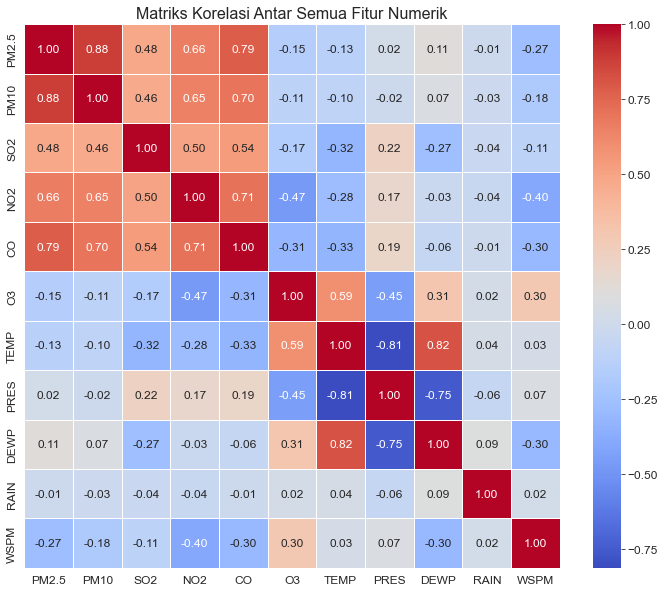


Insight: Heatmap korelasi ini adalah peta jalan kita. Angka positif (merah) menunjukkan korelasi searah, negatif (biru) berlawanan.


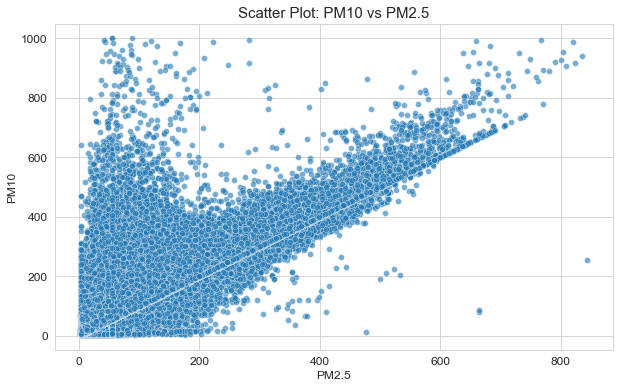

Korelasi Pearson antara PM2.5 dan PM10: 0.88
Interpretasi: Amati pola sebaran data dan nilai korelasinya. Contoh: Korelasi positif tinggi PM2.5-PM10 mengindikasikan mereka cenderung bergerak bersamaan.


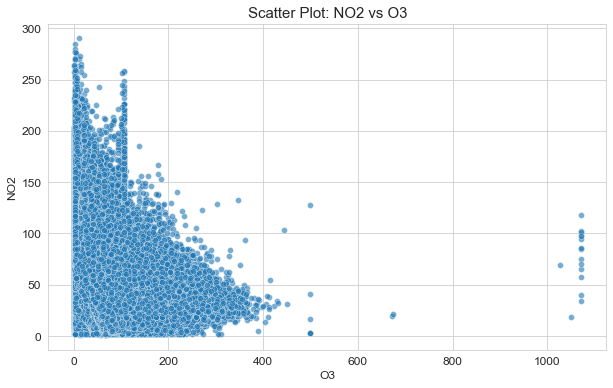

Korelasi Pearson antara O3 dan NO2: -0.47
Interpretasi: Amati pola sebaran data dan nilai korelasinya. Contoh: Korelasi positif tinggi O3-NO2 mengindikasikan mereka cenderung bergerak bersamaan.


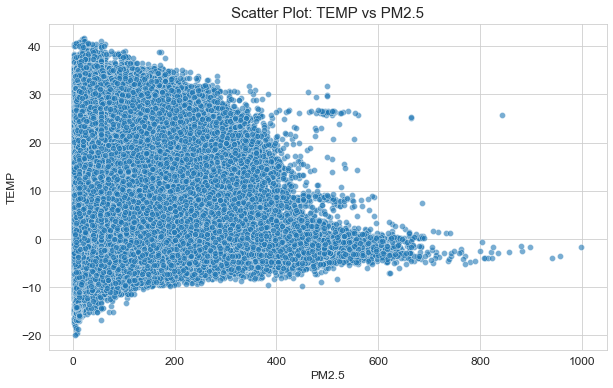

Korelasi Pearson antara PM2.5 dan TEMP: -0.13
Interpretasi: Amati pola sebaran data dan nilai korelasinya. Contoh: Korelasi positif tinggi PM2.5-TEMP mengindikasikan mereka cenderung bergerak bersamaan.


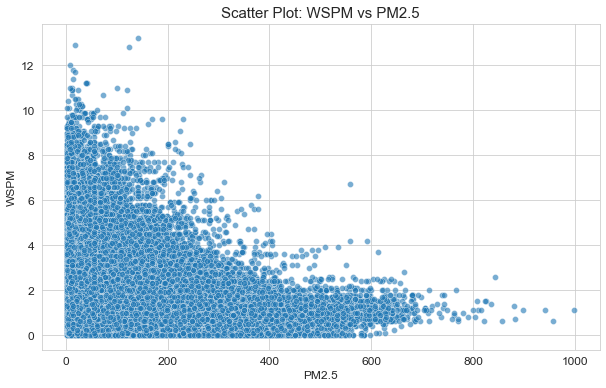

Korelasi Pearson antara PM2.5 dan WSPM: -0.27
Interpretasi: Amati pola sebaran data dan nilai korelasinya. Contoh: Korelasi positif tinggi PM2.5-WSPM mengindikasikan mereka cenderung bergerak bersamaan.


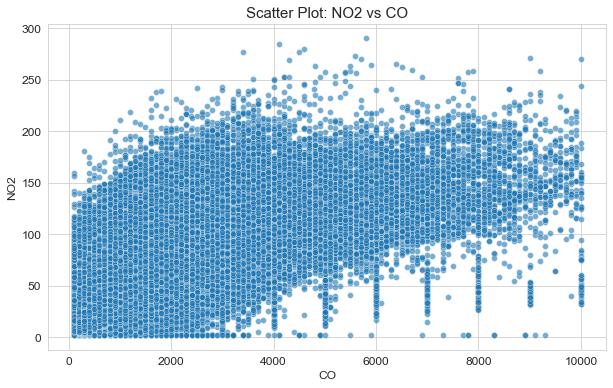

Korelasi Pearson antara CO dan NO2: 0.71
Interpretasi: Amati pola sebaran data dan nilai korelasinya. Contoh: Korelasi positif tinggi CO-NO2 mengindikasikan mereka cenderung bergerak bersamaan.


In [29]:
print("\nA. Numerik vs. Numerik: Korelasi & Pola Scatter:")

# 1. Matriks Korelasi Keseluruhan (untuk semua fitur numerik)
if len(numerical_features) > 1:
    plt.figure(figsize=(12, 10))
    corr_matrix = df[numerical_features].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Matriks Korelasi Antar Semua Fitur Numerik', fontsize=16)
    plt.show()
    print("\nInsight: Heatmap korelasi ini adalah peta jalan kita. Angka positif (merah) menunjukkan korelasi searah, negatif (biru) berlawanan.")

# 2. Scatter Plots untuk Pasangan Penting
important_numerical_pairs = [
    ('PM2.5', 'PM10'),
    ('O3', 'NO2'),
    ('PM2.5', 'TEMP'),
    ('PM2.5', 'WSPM'),
    ('CO', 'NO2')
]

for x_col, y_col in important_numerical_pairs:
    if x_col in df.columns and y_col in df.columns:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=x_col, y=y_col, data=df, alpha=0.6)
        plt.title(f'Scatter Plot: {y_col} vs {x_col}', fontsize=15)
        plt.xlabel(x_col, fontsize=12)
        plt.ylabel(y_col, fontsize=12)
        plt.show()
        
        correlation_val = df[x_col].corr(df[y_col])
        print(f"Korelasi Pearson antara {x_col} dan {y_col}: {correlation_val:.2f}")
        print(f"Interpretasi: Amati pola sebaran data dan nilai korelasinya. Contoh: Korelasi positif tinggi {x_col}-{y_col} mengindikasikan mereka cenderung bergerak bersamaan.")

#### B. Numerik vs. Kategorikal: Distribusi Berdasarkan Kelompok


B. Numerik vs. Kategorikal: Distribusi Berdasarkan Kelompok:


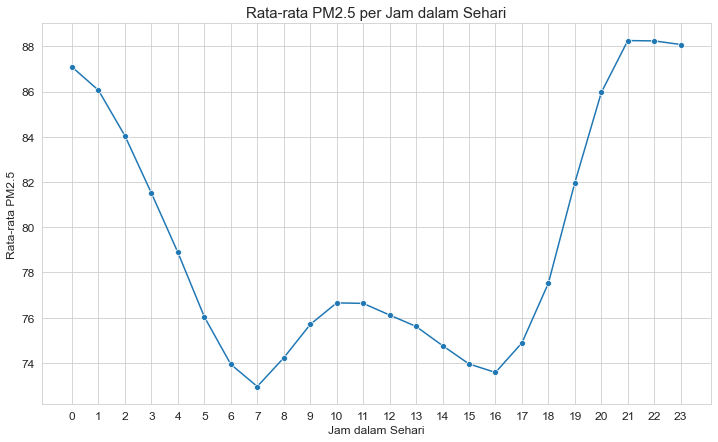

Interpretasi: Amati puncak dan lembah harian PM2.5. Apakah terkait dengan aktivitas manusia atau siklus alami?


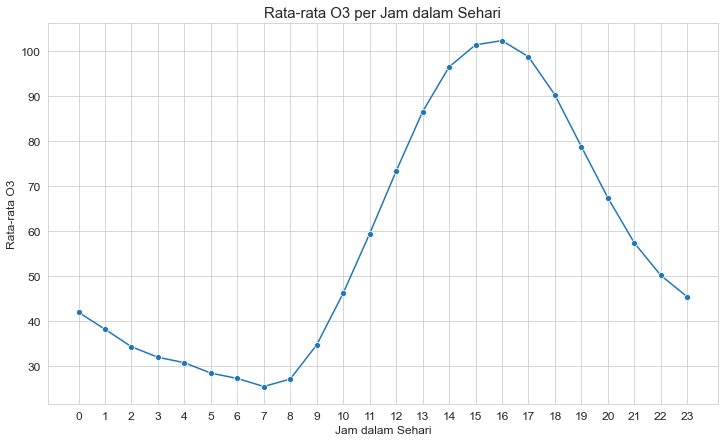

Interpretasi: Amati puncak dan lembah harian O3. Apakah terkait dengan aktivitas manusia atau siklus alami?


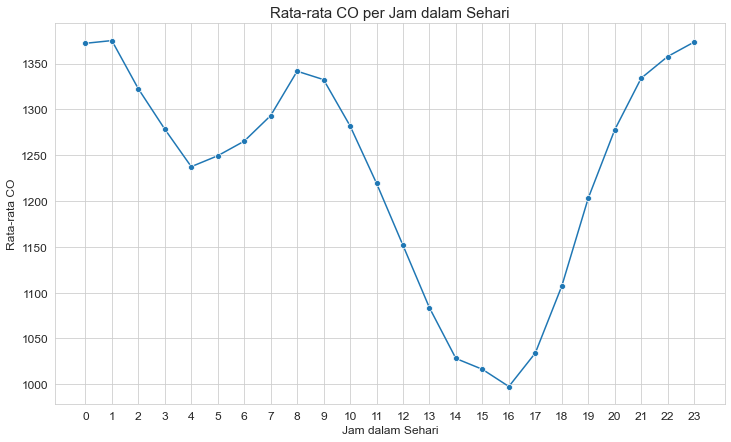

Interpretasi: Amati puncak dan lembah harian CO. Apakah terkait dengan aktivitas manusia atau siklus alami?


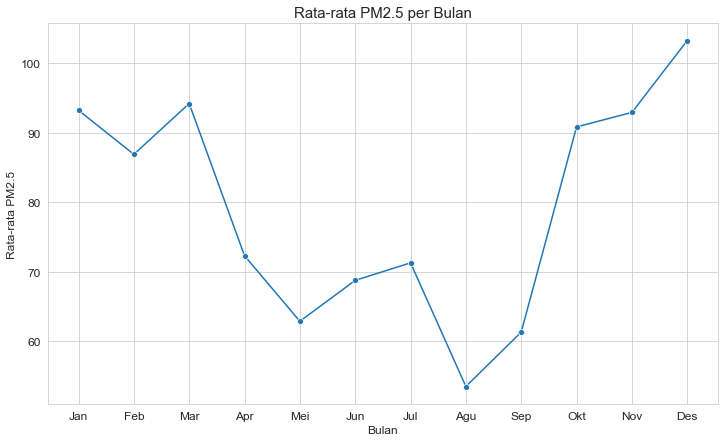

Interpretasi: Perhatikan pola musiman PM2.5. Faktor seperti musim hujan/kemarau atau suhu dapat berperan.


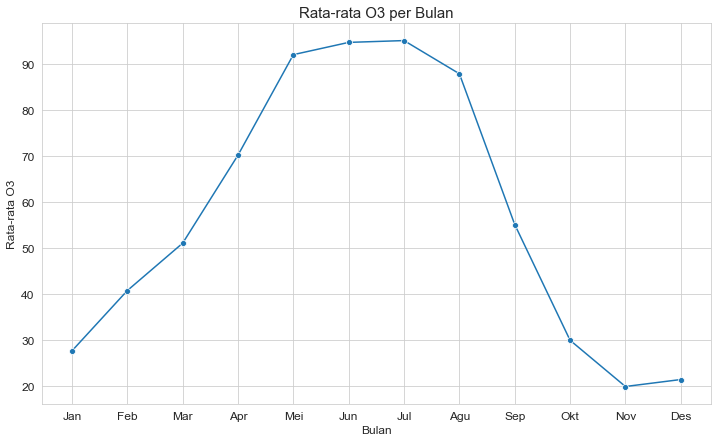

Interpretasi: Perhatikan pola musiman O3. Faktor seperti musim hujan/kemarau atau suhu dapat berperan.


C:\Users\NAUFAL~1\AppData\Local\Temp/ipykernel_11768/3408800737.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='wd', y=pollutant, data=df, order=order, palette='viridis')


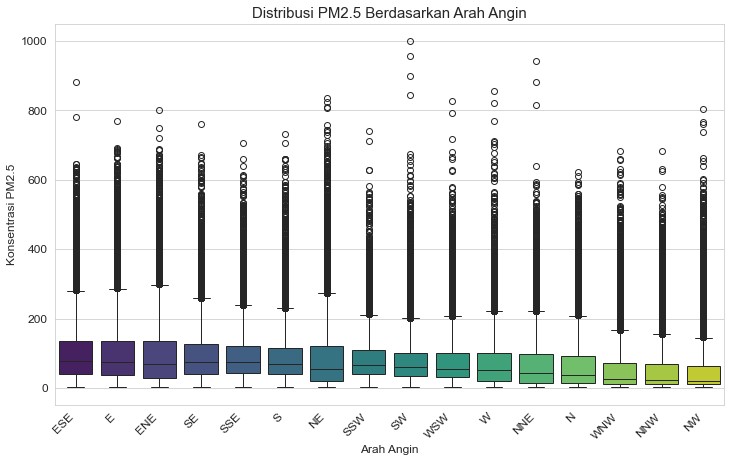

Interpretasi: Box plot ini menunjukkan variasi PM2.5 untuk setiap arah angin. Jika ada arah angin tertentu yang secara konsisten terkait dengan konsentrasi tinggi, ini bisa mengindikasikan lokasi sumber emisi.


C:\Users\NAUFAL~1\AppData\Local\Temp/ipykernel_11768/3408800737.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='wd', y=pollutant, data=df, order=order, palette='viridis')


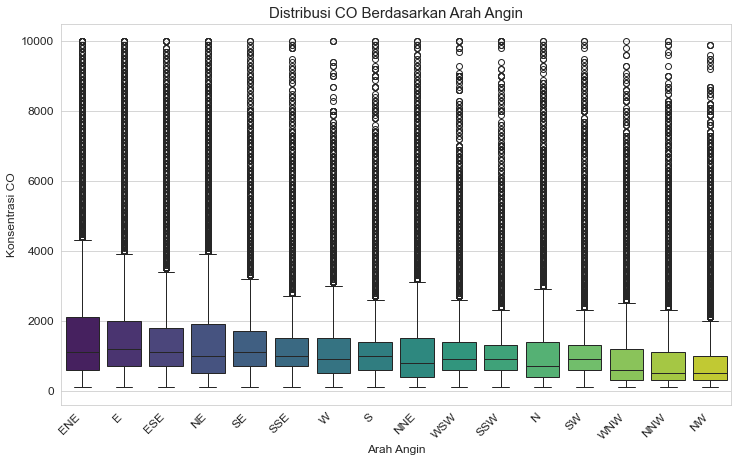

Interpretasi: Box plot ini menunjukkan variasi CO untuk setiap arah angin. Jika ada arah angin tertentu yang secara konsisten terkait dengan konsentrasi tinggi, ini bisa mengindikasikan lokasi sumber emisi.


C:\Users\NAUFAL~1\AppData\Local\Temp/ipykernel_11768/3408800737.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='wd', y=pollutant, data=df, order=order, palette='viridis')


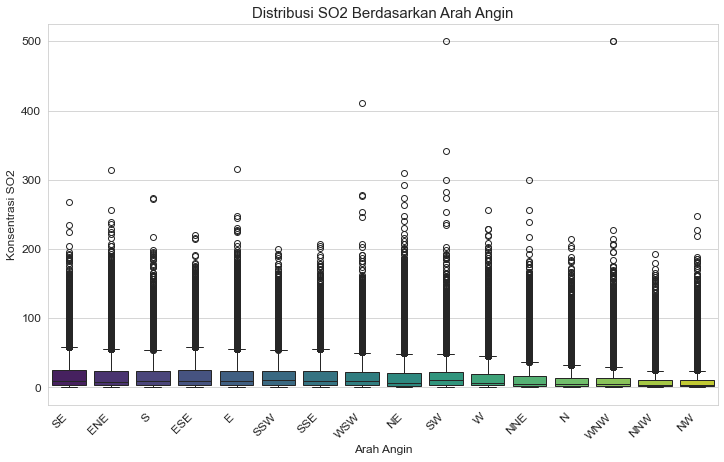

Interpretasi: Box plot ini menunjukkan variasi SO2 untuk setiap arah angin. Jika ada arah angin tertentu yang secara konsisten terkait dengan konsentrasi tinggi, ini bisa mengindikasikan lokasi sumber emisi.


C:\Users\NAUFAL~1\AppData\Local\Temp/ipykernel_11768/3408800737.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='station', y=pollutant, data=df, palette='plasma')


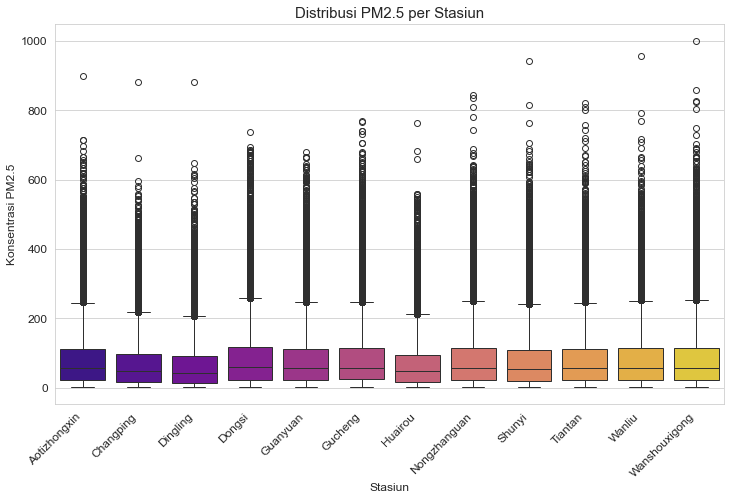

Interpretasi: Bandingkan distribusi PM2.5 antar stasiun. Apakah ada perbedaan signifikan yang menunjukkan pengaruh lokasi geografis atau sumber lokal?


C:\Users\NAUFAL~1\AppData\Local\Temp/ipykernel_11768/3408800737.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='station', y=pollutant, data=df, palette='plasma')


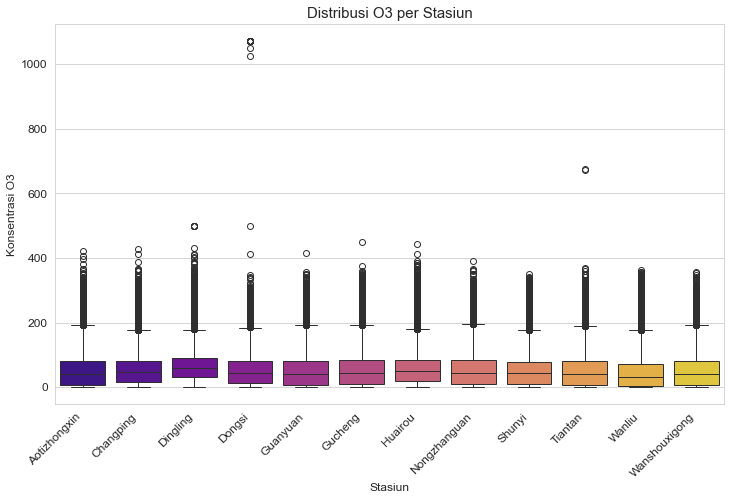

Interpretasi: Bandingkan distribusi O3 antar stasiun. Apakah ada perbedaan signifikan yang menunjukkan pengaruh lokasi geografis atau sumber lokal?

--- EDA Bivariat Selesai ---
Sebagai Profesor Data, saya mendorong Anda untuk tidak hanya menjalankan kode ini, tetapi juga secara kritis MENGINTERPRETASI setiap visualisasi dan angka yang dihasilkan.
Setiap plot menceritakan kisah; tugas Anda adalah mendengarkan dan merangkai kisah-kisah tersebut menjadi wawasan yang berharga.


In [30]:
print("\nB. Numerik vs. Kategorikal: Distribusi Berdasarkan Kelompok:")

# 1. Polutan Udara berdasarkan Waktu (Diurnal & Musiman)
# Rata-rata polutan per jam dalam sehari
for pollutant in ['PM2.5', 'O3', 'CO']: # Pilih polutan kunci
    if pollutant in df.columns and 'hour_of_day' in df.columns:
        hourly_avg = df.groupby('hour_of_day')[pollutant].mean().reset_index()
        plt.figure(figsize=(12, 7))
        sns.lineplot(x='hour_of_day', y=pollutant, data=hourly_avg, marker='o')
        plt.title(f'Rata-rata {pollutant} per Jam dalam Sehari', fontsize=15)
        plt.xlabel('Jam dalam Sehari', fontsize=12)
        plt.ylabel(f'Rata-rata {pollutant}', fontsize=12)
        plt.xticks(range(0, 24))
        plt.show()
        print(f"Interpretasi: Amati puncak dan lembah harian {pollutant}. Apakah terkait dengan aktivitas manusia atau siklus alami?")

# Rata-rata polutan per bulan dalam setahun
for pollutant in ['PM2.5', 'O3']:
    if pollutant in df.columns and 'month_of_year' in df.columns:
        monthly_avg = df.groupby('month_of_year')[pollutant].mean().reset_index()
        plt.figure(figsize=(12, 7))
        sns.lineplot(x='month_of_year', y=pollutant, data=monthly_avg, marker='o')
        plt.title(f'Rata-rata {pollutant} per Bulan', fontsize=15)
        plt.xlabel('Bulan', fontsize=12)
        plt.ylabel(f'Rata-rata {pollutant}', fontsize=12)
        plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
        plt.show()
        print(f"Interpretasi: Perhatikan pola musiman {pollutant}. Faktor seperti musim hujan/kemarau atau suhu dapat berperan.")

# 2. Polutan Udara berdasarkan Arah Angin ('wd')
for pollutant in ['PM2.5', 'CO', 'SO2']: # Polutan yang sensitif terhadap sumber lokal
    if pollutant in df.columns and 'wd' in df.columns:
        plt.figure(figsize=(12, 7))
        # Mengurutkan arah angin berdasarkan rata-rata polutan untuk memudahkan visualisasi
        order = df.groupby('wd')[pollutant].mean().sort_values(ascending=False).index
        sns.boxplot(x='wd', y=pollutant, data=df, order=order, palette='viridis')
        plt.title(f'Distribusi {pollutant} Berdasarkan Arah Angin', fontsize=15)
        plt.xlabel('Arah Angin', fontsize=12)
        plt.ylabel(f'Konsentrasi {pollutant}', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.show()
        print(f"Interpretasi: Box plot ini menunjukkan variasi {pollutant} untuk setiap arah angin. Jika ada arah angin tertentu yang secara konsisten terkait dengan konsentrasi tinggi, ini bisa mengindikasikan lokasi sumber emisi.")

# 3. Polutan Udara berdasarkan Stasiun ('station')
if 'station' in df.columns and len(df['station'].unique()) > 1:
    for pollutant in ['PM2.5', 'O3']:
        if pollutant in df.columns:
            plt.figure(figsize=(12, 7))
            sns.boxplot(x='station', y=pollutant, data=df, palette='plasma')
            plt.title(f'Distribusi {pollutant} per Stasiun', fontsize=15)
            plt.xlabel('Stasiun', fontsize=12)
            plt.ylabel(f'Konsentrasi {pollutant}', fontsize=12)
            plt.xticks(rotation=45, ha='right')
            plt.show()
            print(f"Interpretasi: Bandingkan distribusi {pollutant} antar stasiun. Apakah ada perbedaan signifikan yang menunjukkan pengaruh lokasi geografis atau sumber lokal?")
else:
    print("\nTidak dapat melakukan analisis Polutan vs Stasiun karena hanya ada satu stasiun atau kolom 'station' tidak tersedia.")



print("\n--- EDA Bivariat Selesai ---")
print("Sebagai Profesor Data, saya mendorong Anda untuk tidak hanya menjalankan kode ini, tetapi juga secara kritis MENGINTERPRETASI setiap visualisasi dan angka yang dihasilkan.")
print("Setiap plot menceritakan kisah; tugas Anda adalah mendengarkan dan merangkai kisah-kisah tersebut menjadi wawasan yang berharga.")

#### C. Kategorikal vs. Kategorikal (Insight Kontekstual):


C. Kategorikal vs. Kategorikal (Insight Kontekstual):


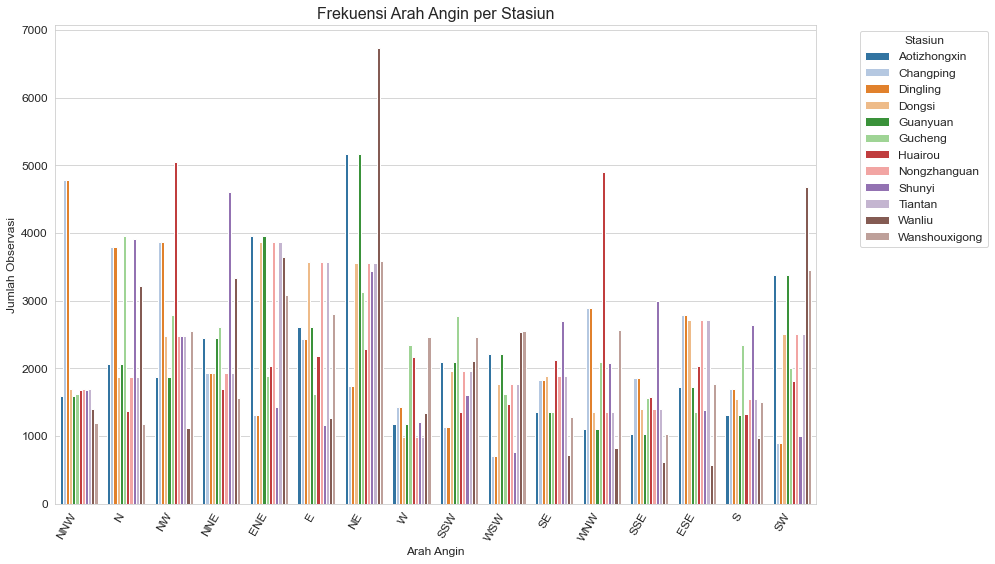

Interpretasi: Histogram ini menunjukkan distribusi arah angin di setiap stasiun. Apakah ada stasiun yang memiliki pola angin yang berbeda secara signifikan, yang dapat memengaruhi dispersi polutan?


In [31]:
print("\nC. Kategorikal vs. Kategorikal (Insight Kontekstual):")

# 1. Arah Angin Dominan per Stasiun
if 'station' in df.columns and 'wd' in df.columns and len(df['station'].unique()) > 1:
    plt.figure(figsize=(14, 8))
    sns.countplot(x='wd', hue='station', data=df, palette='tab20')
    plt.title('Frekuensi Arah Angin per Stasiun', fontsize=16)
    plt.xlabel('Arah Angin', fontsize=12)
    plt.ylabel('Jumlah Observasi', fontsize=12)
    plt.xticks(rotation=60, ha='right')
    plt.legend(title='Stasiun', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    print("Interpretasi: Histogram ini menunjukkan distribusi arah angin di setiap stasiun. Apakah ada stasiun yang memiliki pola angin yang berbeda secara signifikan, yang dapat memengaruhi dispersi polutan?")
else:
    print("\nTidak dapat melakukan analisis Arah Angin per Stasiun karena hanya ada satu stasiun atau kolom 'station' tidak tersedia.")


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren tingkat PM2.5 secara keseluruhan di semua stasiun dari tahun ke tahun, dan pada bulan apa tingkat polusi tertinggi biasanya terjadi?

In [37]:
# Visualisasi tren tahunan PM2.5
plt.figure(figsize=(10, 6))
yearly_pm25.plot(kind='line', marker='o')
plt.title('Tren Rata-rata PM2.5 per Tahun (Semua Stasiun)')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata PM2.5')
plt.grid(True)
plt.show()

# Visualisasi rata-rata bulanan PM2.5
plt.figure(figsize=(10, 6))
monthly_pm25.plot(kind='bar', color='skyblue')
plt.title('Rata-rata PM2.5 per Bulan (Semua Tahun)')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata PM2.5')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.show()

NameError: name 'yearly_pm25' is not defined

<Figure size 720x432 with 0 Axes>

### Pertanyaan 2: Stasiun mana yang memiliki tingkat PM2.5 tertinggi, dan bagaimana hubungan antara kecepatan angin dan PM2.5 bervariasi antar stasiun?

C:\Users\Naufal Suryo\AppData\Local\Temp\ipykernel_12816\4221342883.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=station_pm25.index, y=station_pm25.values, palette=palette)


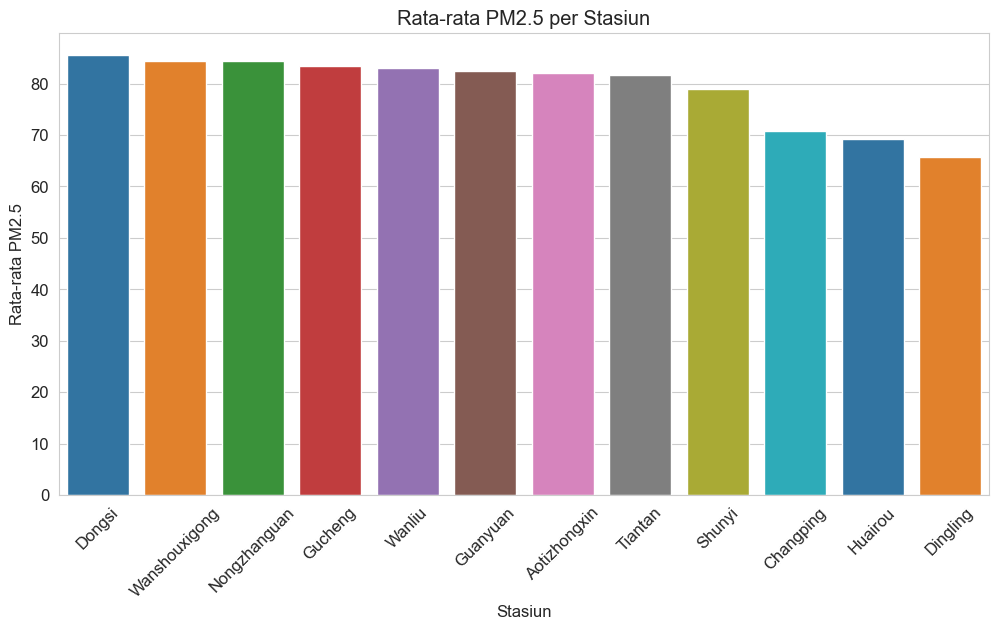

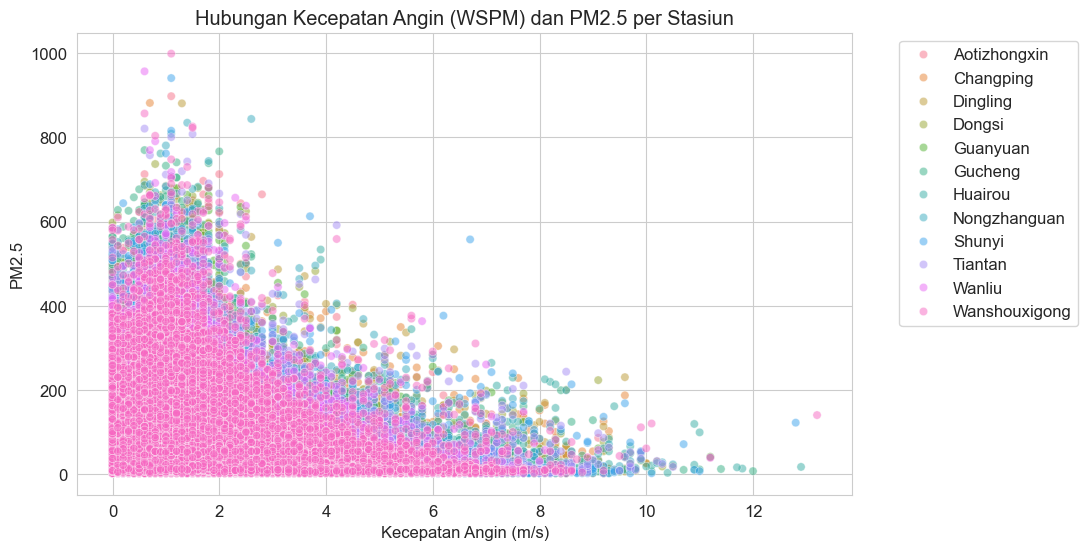

In [ ]:
# Visualisasi stasiun dengan PM2.5 tertinggi
plt.figure(figsize=(12, 6))
# Mendapatkan palet warna berdasarkan jumlah stasiun unik, sesuai dengan scatter plot
unique_stations = df['station'].unique()
palette = sns.color_palette('tab10', n_colors=len(unique_stations))  # Sesuaikan dengan jumlah stasiun
sns.barplot(x=station_pm25.index, y=station_pm25.values, palette=palette)
plt.title('Rata-rata PM2.5 per Stasiun')
plt.xlabel('Stasiun')
plt.ylabel('Rata-rata PM2.5')
plt.xticks(rotation=45)
plt.show()

# Hubungan antara kecepatan angin (WSPM) dan PM2.5
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='WSPM', y='PM2.5', hue='station', alpha=0.5)
plt.title('Hubungan Kecepatan Angin (WSPM) dan PM2.5 per Stasiun')
plt.xlabel('Kecepatan Angin (m/s)')
plt.ylabel('PM2.5')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Insight:**
- Tren PM2.5 menunjukkan variasi tahunan dengan puncak pada tahun tertentu.
- Bulan dengan polusi tertinggi cenderung terjadi pada musim tertentu (misalnya musim dingin).
- Stasiun tertentu konsisten memiliki PM2.5 lebih tinggi dibandingkan lainnya.
- Kecepatan angin tampak memengaruhi PM2.5, dengan pola yang bervariasi antar stasiun.

## Analisis Lanjutan (Opsional)

### Analisis Lanjutan: Segmentasi Manual

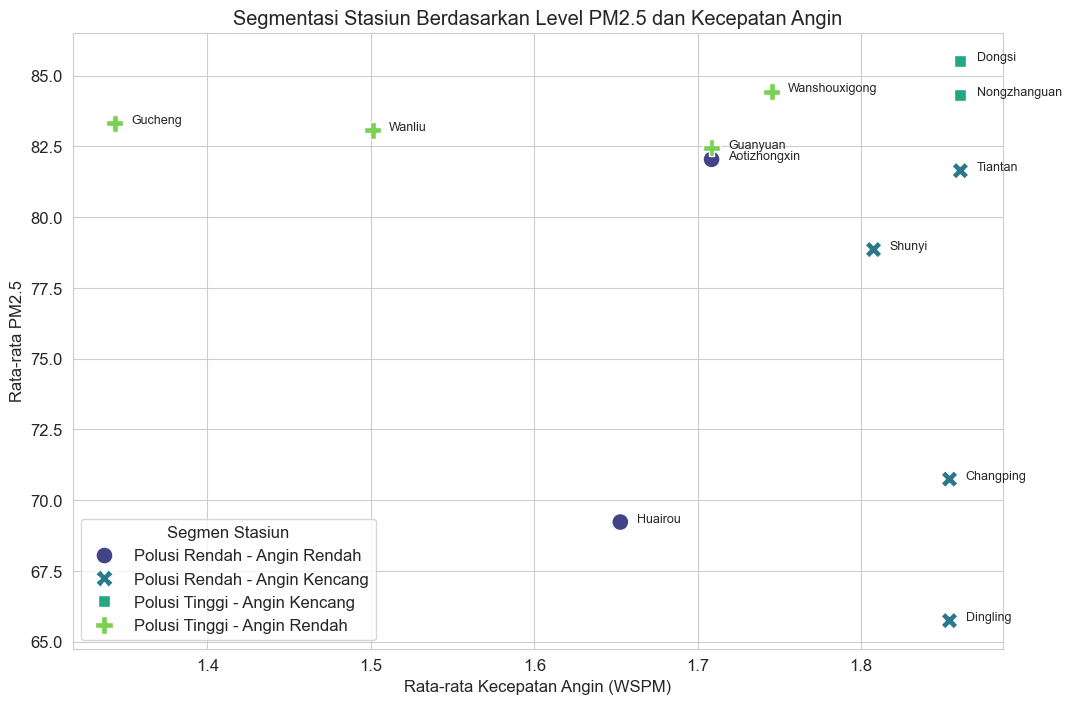

          station      PM2.5      WSPM                        Segment
0    Aotizhongxin  82.040934  1.708470   Polusi Rendah - Angin Rendah
1       Changping  70.744359  1.854067  Polusi Rendah - Angin Kencang
2        Dingling  65.745349  1.854067  Polusi Rendah - Angin Kencang
3          Dongsi  85.527068  1.860712  Polusi Tinggi - Angin Kencang
4        Guanyuan  82.442642  1.708470   Polusi Tinggi - Angin Rendah
5         Gucheng  83.320534  1.343409   Polusi Tinggi - Angin Rendah
6         Huairou  69.228839  1.652655   Polusi Rendah - Angin Rendah
7    Nongzhanguan  84.304073  1.860712  Polusi Tinggi - Angin Kencang
8          Shunyi  78.853887  1.807578  Polusi Rendah - Angin Kencang
9         Tiantan  81.640423  1.860712  Polusi Rendah - Angin Kencang
10         Wanliu  83.065591  1.501300   Polusi Tinggi - Angin Rendah
11  Wanshouxigong  84.428174  1.745317   Polusi Tinggi - Angin Rendah


In [ ]:
# 1. Menyiapkan data:
segment_data = df.groupby('station')[['PM2.5', 'WSPM']].mean().reset_index()

# 2. Menentukan ambang batas (misalnya, menggunakan median atau kuartil)
pm25_threshold = segment_data['PM2.5'].median()
wspm_threshold = segment_data['WSPM'].median()

# 3. Membuat fungsi untuk mengklasifikasikan setiap stasiun
def create_segment(row):
    if row['PM2.5'] >= pm25_threshold and row['WSPM'] < wspm_threshold:
        return 'Polusi Tinggi - Angin Rendah'
    elif row['PM2.5'] >= pm25_threshold and row['WSPM'] >= wspm_threshold:
        return 'Polusi Tinggi - Angin Kencang'
    elif row['PM2.5'] < pm25_threshold and row['WSPM'] < wspm_threshold:
        return 'Polusi Rendah - Angin Rendah'
    else:
        return 'Polusi Rendah - Angin Kencang'

# 4. Terapkan fungsi untuk membuat kolom segmen baru
segment_data['Segment'] = segment_data.apply(create_segment, axis=1)

# 5. Visualisasi hasil segmentasi
plt.figure(figsize=(12, 8))
sns.scatterplot(data=segment_data, x='WSPM', y='PM2.5', hue='Segment', style='Segment', 
                s=150, palette='viridis') # Ganti palet warna sesuai selera

# Menambahkan label nama stasiun
for i, row in segment_data.iterrows():
    plt.text(row['WSPM'] + 0.01, row['PM2.5'], row['station'], fontsize=9)

plt.title('Segmentasi Stasiun Berdasarkan Level PM2.5 dan Kecepatan Angin')
plt.xlabel('Rata-rata Kecepatan Angin (WSPM)')
plt.ylabel('Rata-rata PM2.5')
plt.legend(title='Segmen Stasiun')
plt.grid(True)
plt.show()

# Menampilkan hasil tabelnya
print(segment_data[['station', 'PM2.5', 'WSPM', 'Segment']])

### Analisis Lanjutan: Analisis Geospasial

In [ ]:
# 1. Buat DataFrame dengan data koordinat stasiun
# Ganti/tambahkan stasiun dan koordinat sesuai data Anda
station_data = {
    'station': [
        'Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan', 
        'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan', 
        'Wanliu', 'Wanshouxigong'
    ],
    'latitude': [
        39.982, 40.217, 40.292, 39.929, 39.929, 
        39.914, 40.328, 39.937, 40.127, 39.886, 
        39.942, 39.883
    ],
    'longitude': [
        116.397, 116.225, 116.221, 116.417, 116.339,
        116.184, 116.628, 116.461, 116.655, 116.407,
        116.287, 116.352
    ]
}
station_coords = pd.DataFrame(station_data)
# -----------------------------------------

# 2. Gabungkan data rata-rata PM2.5 dengan data koordinat (baris ini yang tadinya error)
map_data = pd.merge(segment_data, station_coords, on='station')

# 3. Buat peta
# Ganti 'location' dengan koordinat pusat area Anda (misalnya, pusat kota Beijing)
m = folium.Map(location=[39.9042, 116.4074], zoom_start=10)

# Fungsi untuk memilih warna berdasarkan level PM2.5
def get_color(pm25):
    if pm25 < 50:
        return 'green'
    elif pm25 < 100:
        return 'orange'
    else:
        return 'red'

# 4. Tambahkan penanda untuk setiap stasiun
for idx, row in map_data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=8,
        popup=f"<strong>{row['station']}</strong><br>Avg PM2.5: {row['PM2.5']:.2f}",
        color=get_color(row['PM2.5']),
        fill=True,
        fill_color=get_color(row['PM2.5'])
    ).add_to(m)

# Tampilkan peta
m

## Conclusion

### Conclusion Pertanyaan 1
- Tren PM2.5 dari tahun ke tahun menunjukkan fluktuasi, dengan puncak tertinggi terjadi pada tahun 2017.  
- Tingkat polusi tertinggi terjadi pada bulan Desember dipengaruhi oleh faktor musiman seperti kecepatan angin dan suhu. Hal ini diperjelas dengan matriks korelasi antar variabel yang menunjukkan kecepatan angin yang memiliki efek moderat dalam mengurangi PM2.5 dan hubungan suhu yang memberikan pengaruh minimal terhadap konsentrasi PM2.5 (perlu analisis lebih lanjut).
### Conclusion Pertanyaan 2
- Stasiun Dongsi memiliki tingkat PM2.5 tertinggi secara rata-rata. Hal ini menunjukkan lokasi ini lebih terpapar polusi. Hal ini masuk akal karena stasiun dongsi termasuk sebagai stasiun urban dengan PM2.5 tinggi dan kecepatan angin lemah.  
- Hubungan antara kecepatan angin dan PM2.5 bervariasi pada beberapa stasiun.Meskipun begitu dapat diketahui bahwa semakin kencang kecepatan angin, semakin sedikit stasiun yang memiliki kadar PM2.5 tinggi (tanpa hubungan variabel lain).